In [12]:
import pandas as pd
df = pd.read_csv('series-230425 (1).csv') # Read ONS trade data
df = df.drop(list(range(0,147))).reset_index(drop=True) # Get rid of header & additional info and reset index.
df.rename(columns={df.columns[0]: 'date', df.columns[1]: 'exports'}, inplace=True) # Re-name columns for simplicity
df['exports'] = pd.to_numeric(df['exports'], errors='coerce')

df

,date,exports
0,1997 JAN,14137
1,1997 FEB,13580
2,1997 MAR,14072
3,1997 APR,14713
4,1997 MAY,13895
...,...,...
333,2024 OCT,30992
334,2024 NOV,30152
335,2024 DEC,28565
336,2025 JAN,28640


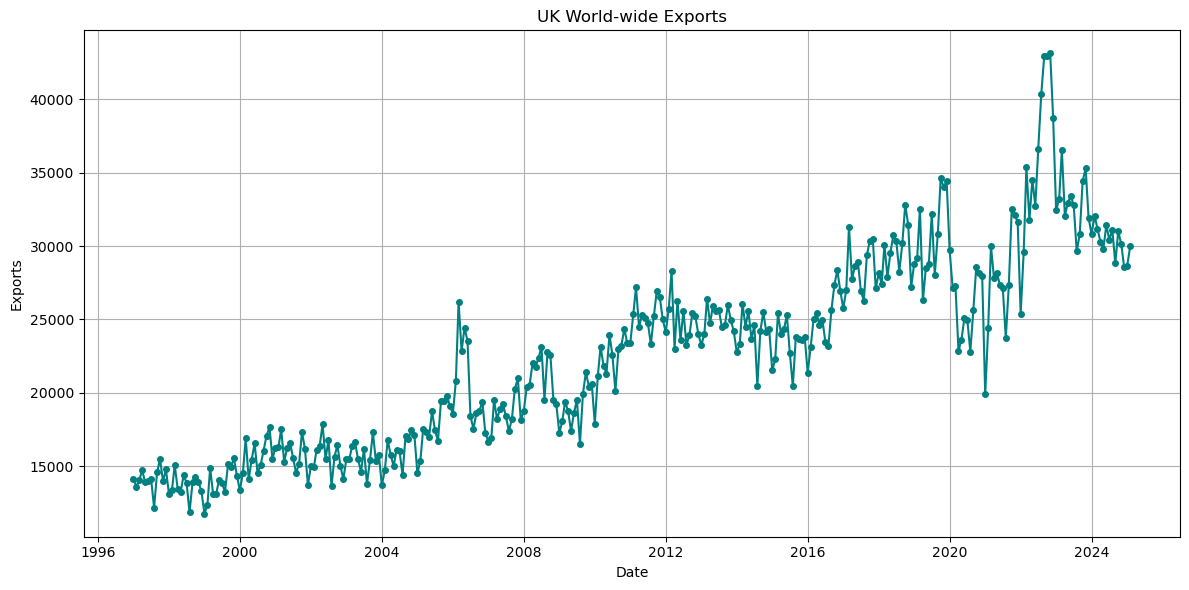

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['date'] = pd.to_datetime(df['date'], format='%Y %b') # Make 'date' column datetime type

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['exports'], marker='o', markersize=4,linestyle='-', color='teal')
plt.title('UK World-wide Exports')
plt.xlabel('Date')
plt.ylabel('Exports')
plt.grid(True)
plt.tight_layout()
plt.show()  

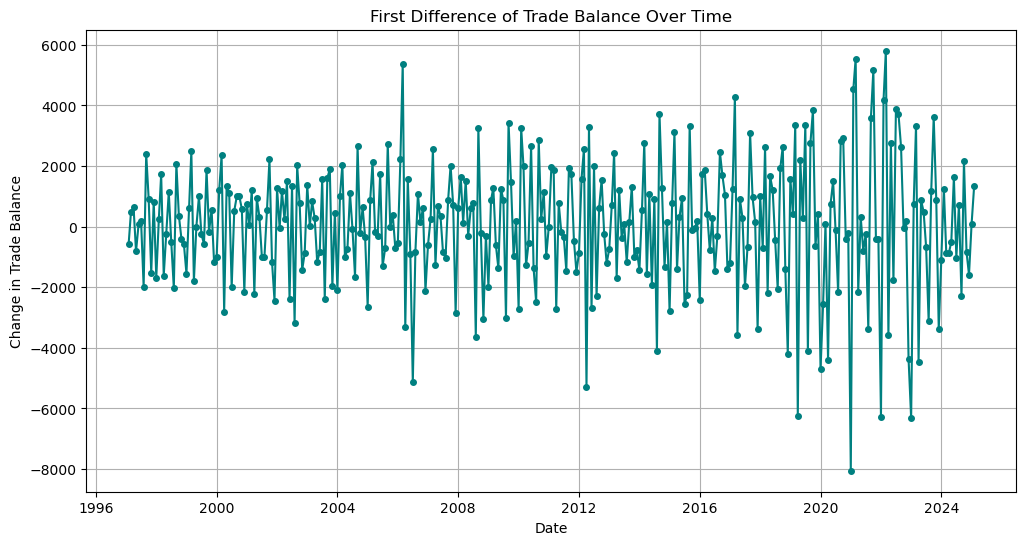

ADF Statistic: -5.74977981258532
p-value: 6.003841841406085e-07


In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['exports'].diff(), marker='o', markersize =4, linestyle='-', color='teal')
plt.xlabel("Date")
plt.ylabel("Change in Trade Balance")
plt.title("First Difference of Trade Balance Over Time")
plt.grid(True)
plt.show()

from statsmodels.tsa.stattools import adfuller

# Make sure the tradebalance column is numeric
df['exports'] = pd.to_numeric(df['exports'], errors='coerce')

# Take first difference & drop missing values (optional but useful before ADF)
diff_series = df['exports'].diff().dropna()

# Perform Augmented Dickey-Fuller test
result = adfuller(diff_series)

# Print the test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])


After first-differencing, exports seem stationary.